In [19]:
ls

Malaria cell dataset.txt  Parasitized/              cells_malaria.zip
Malaria_detection.ipynb   Uninfected/


In [5]:
cat Malaria\ cell\ dataset.txt

https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria?


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [11]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

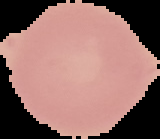

In [29]:
img

In [20]:
import os
print(len(os.listdir("Uninfected")))
print(len(os.listdir("Parasitized")))

13780
13780


In [43]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [52]:
import splitfolders
input_folder = "/Users/makhanov/Yandex.Disk.localized/week4/day5/malaria/cells_malaria/"
output = "output_path" #where you want the split datasets saved. one will be created if none is set
splitfolders.ratio(input_folder, output="output", seed=42, ratio=(.8, .1, .1))





Copying files: 0 files [00:00, ? files/s]



Copying files: 1 files [00:00,  2.74 files/s]



Copying files: 123 files [00:00,  3.91 files/s]



Copying files: 214 files [00:00,  5.58 files/s]



Copying files: 301 files [00:00,  7.95 files/s]



Copying files: 409 files [00:00, 11.32 files/s]



Copying files: 522 files [00:00, 16.10 files/s]



Copying files: 631 files [00:00, 22.85 files/s]



Copying files: 763 files [00:01, 32.40 files/s]



Copying files: 881 files [00:01, 45.74 files/s]



Copying files: 990 files [00:01, 63.85 files/s]



Copying files: 1104 files [00:01, 89.07 files/s]



Copying files: 1230 files [00:01, 123.47 files/s]



Copying files: 1341 files [00:01, 168.34 files/s]



Copying files: 1463 files [00:01, 227.05 files/s]



Copying files: 1578 files [00:01, 298.33 files/s]



Copying files: 1701 files [00:01, 386.04 files/s]



Copying files: 1827 files [00:02, 487.24 files/s]



Copying files: 1957 files [00:02, 599.43 files/s]



Copying files: 2096 

Copying files: 15361 files [00:14, 1047.72 files/s]



Copying files: 15497 files [00:14, 1123.91 files/s]



Copying files: 15630 files [00:15, 1178.12 files/s]



Copying files: 15766 files [00:15, 1226.37 files/s]



Copying files: 15902 files [00:15, 1263.10 files/s]



Copying files: 16037 files [00:15, 1286.40 files/s]



Copying files: 16171 files [00:15, 1300.00 files/s]



Copying files: 16306 files [00:15, 1311.72 files/s]



Copying files: 16439 files [00:15, 1298.32 files/s]



Copying files: 16576 files [00:15, 1318.90 files/s]



Copying files: 16716 files [00:15, 1341.63 files/s]



Copying files: 16858 files [00:15, 1360.81 files/s]



Copying files: 17004 files [00:16, 1387.19 files/s]



Copying files: 17147 files [00:16, 1398.67 files/s]



Copying files: 17293 files [00:16, 1415.46 files/s]



Copying files: 17441 files [00:16, 1433.56 files/s]



Copying files: 17585 files [00:16, 1429.18 files/s]



Copying files: 17730 files [00:16, 1435.14 files/s]



Copying fi

In [37]:
import tensorflow as tf

## Load all the images

In [54]:
ls output

test/  train/ val/


In [55]:
img_width, img_height = 130, 130
train_data_dir = 'output/train'
validation_data_dir = 'output/val'
test_data_dir = 'output/test'

In [57]:
print(len(os.listdir("output/test/Uninfected")))
print(len(os.listdir("output/test/Parasitized")))

1378
1378


In [58]:
print(len(os.listdir("output/test")))

2


In [89]:
image_size = (130, 130)
batch_size = 64
epochs = 30
input_shape = (130, 130, 3)

In [104]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [93]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

In [64]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [96]:
model.fit_generator(
    train_generator,
    steps_per_epoch=22046 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=2756 // batch_size,
    callbacks=[es])
model.save_weights('malaria_1.h5')

Epoch 1/30
344/344 [==============================] - 80s 234ms/step - loss: 0.6397 - accuracy: 0.6368 - val_loss: 0.5830 - val_accuracy: 0.6810
Epoch 2/30
344/344 [==============================] - 85s 248ms/step - loss: 0.4547 - accuracy: 0.8023 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 3/30
344/344 [==============================] - 91s 265ms/step - loss: 0.2489 - accuracy: 0.9113 - val_loss: 0.2047 - val_accuracy: 0.9288
Epoch 4/30
344/344 [==============================] - 92s 266ms/step - loss: 0.2153 - accuracy: 0.9251 - val_loss: 0.1924 - val_accuracy: 0.9346
Epoch 5/30
344/344 [==============================] - 94s 274ms/step - loss: 0.2001 - accuracy: 0.9313 - val_loss: 0.1851 - val_accuracy: 0.9339


In [103]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2)

In [106]:
model.fit_generator(
    train_generator,
    steps_per_epoch=22046 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=2756 // batch_size,
    callbacks=[es])
model.save_weights('malaria_2.h5')

Epoch 1/30
344/344 [==============================] - 89s 259ms/step - loss: 0.5912 - accuracy: 0.7194 - val_loss: 0.3212 - val_accuracy: 0.8859
Epoch 2/30
344/344 [==============================] - 98s 286ms/step - loss: 0.2522 - accuracy: 0.9088 - val_loss: 0.1896 - val_accuracy: 0.9411
Epoch 3/30
344/344 [==============================] - 102s 298ms/step - loss: 0.2116 - accuracy: 0.9270 - val_loss: 0.2029 - val_accuracy: 0.9331
Epoch 4/30
344/344 [==============================] - 105s 306ms/step - loss: 0.1935 - accuracy: 0.9339 - val_loss: 0.1811 - val_accuracy: 0.9448
Epoch 5/30
344/344 [==============================] - 111s 323ms/step - loss: 0.2069 - accuracy: 0.9387 - val_loss: 0.2080 - val_accuracy: 0.9317
Epoch 6/30
344/344 [==============================] - 121s 352ms/step - loss: 0.2107 - accuracy: 0.9350 - val_loss: 0.3474 - val_accuracy: 0.8772
